In [1]:
%load_ext Cython
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cma
sns.set(rc={"figure.figsize": (6, 6)})
sns.set_palette('colorblind')

In [2]:
%%cython
cimport cython
cimport numpy as np
import numpy as np

@cython.boundscheck(False)
@cython.wraparound(False)
def list_of_sequence_size(np.ndarray a):
    cdef int start = -1
    cdef int i
    out = []
    for i in range(len(a)):
        if start == -1 and a[i] == 1:
            start = i
        if start != -1 and a[i] == 0:
            out.append(i - start)
            start = -1
    if start != -1:
        out.append(len(a) - start)
    return out

def sequence_size(a):
    return list_of_sequence_size(a.values)

def sequence_size_mean(a):
    elems = sequence_size(a)
    if elems:
        return np.mean(elems)
    else:
        return np.NaN

In [3]:
elems = ['partner_choice_cma']

In [4]:
for elem in elems:
    logger = cma.CMADataLogger('../logs/{}/cmaes'.format(elem))
    #logger.plot_divers()


In [5]:
fit = np.loadtxt("../logs/partner_choice_cma/cmaesfit.dat", comments=("%", "#"))

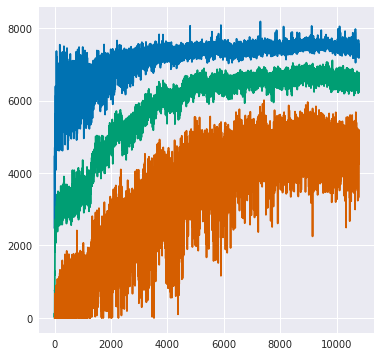

In [17]:
plt.plot(-fit[:, -3:])

In [19]:
out = []
max_gen = 0
for elem in elems:
    logdir = '../logs/{}/'.format(elem)
    data = pd.read_csv(logdir + 'observer.txt', delimiter='\t')
    max_gen = data['gen'].max()
    
    data['onValueObj'] = data['onOpp'] * data['coop']
    data['onNonValueObj'] = data['onOpp'] * (1 - data['coop'])
    data['exploring'] = 1 - data['onOpp']
    cur_gen = data.query("gen == {}".format(max_gen))
    cur_gen.groupby('ind').mean()[['onValueObj', 'onNonValueObj', 'exploring']]
    vals = cur_gen.groupby('ind').mean()[['onValueObj', 'onNonValueObj', 'exploring']]
    for dummy, val in vals.iterrows():
        out.append({
            'group': elem,
            'ind': dummy,
            'status': 'onActiveObj',
            'time': val['onValueObj']
        })
        out.append({
            'group': elem,
            'ind': dummy,
            'status': 'onInactiveObj',
            'time': val['onNonValueObj']
        })
        out.append({
            'group': elem,
            'ind': dummy,
            'status': 'exploring',
            'time': val['exploring']
        })
data = pd.DataFrame(out)

Text(0.5,1,'Pourcentage de temps moyen passé par individu au bout de 10599 générations (529950 évulations)')

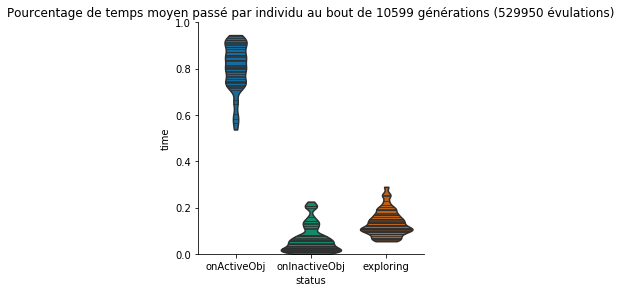

In [20]:
sns.factorplot(kind="violin", cut=0, x="status", y="time", inner="stick", data=data, size=4, facet_kws={'ylim': [0, 1]}, bw=0.2
        )
plt.title('Pourcentage de temps moyen passé par individu au bout de {} générations ({} évulations)'.format(max_gen, max_gen*50))

In [8]:
data.query('status == "onActiveObj"').groupby('group').max()['time']

group
partner_choice_cma    0.946071
Name: time, dtype: float64

In [9]:
data.query('group == "elman_nosee" and ind == 8')

,group,ind,status,time


In [11]:
data = pd.read_csv("../logs/partner_choice_cma/analysis_log.txt", delimiter="\t")

FileNotFoundError: File b'../logs/partner_choice_cma/analysis_log.txt' does not exist

In [60]:
cur_gen = data.query("generation == {}".format(max))
cur_gen

,generation,ind,rank,coop,rep,it,onOpp
100000,1999,34,50,0,0,0,0
100001,1999,34,50,0,0,1,0
100002,1999,34,50,0,0,2,0
100003,1999,34,50,0,0,3,0
100004,1999,34,50,0,0,4,0
100005,1999,34,50,0,0,5,0
100006,1999,34,50,0,0,6,0
100007,1999,34,50,0,0,7,0
100008,1999,34,50,0,0,8,0
100009,1999,34,50,0,0,9,0


In [61]:
s = cur_gen.diff()['onOpp']
cur_gen['enterOpp'] = s
cur_gen

/home/paul/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,generation,ind,rank,coop,rep,it,onOpp,enterOpp
100000,1999,34,50,0,0,0,0,NaN
100001,1999,34,50,0,0,1,0,0.0
100002,1999,34,50,0,0,2,0,0.0
100003,1999,34,50,0,0,3,0,0.0
100004,1999,34,50,0,0,4,0,0.0
100005,1999,34,50,0,0,5,0,0.0
100006,1999,34,50,0,0,6,0,0.0
100007,1999,34,50,0,0,7,0,0.0
100008,1999,34,50,0,0,8,0,0.0
100009,1999,34,50,0,0,9,0,0.0


(0, 250)

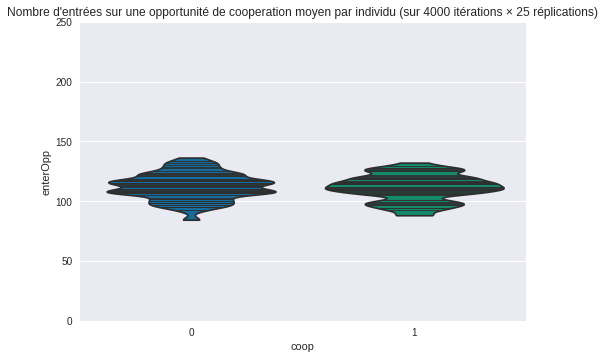

In [62]:
entrance = cur_gen.query('enterOpp == 1').groupby(('coop', 'ind'), as_index=False).sum()
entrance['enterOpp'] /= 25
sns.violinplot(data=entrance, x='coop', y='enterOpp', inner='stick', bw=0.2, cut=0)
plt.title("Nombre d'entrées sur une opportunité de cooperation moyen par individu (sur 4000 itérations × 25 réplications)")
plt.ylim((0, 250))

(0, 1)

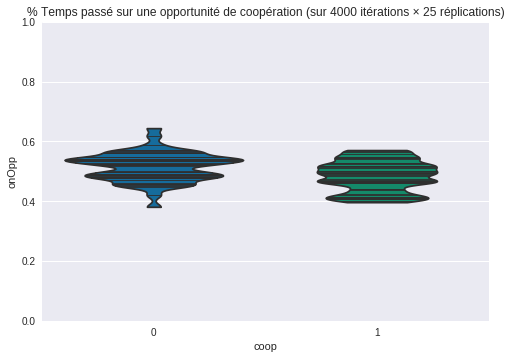

In [63]:
av_on_coop = cur_gen.groupby(('ind', 'coop'), as_index=False)['onOpp'].mean()
sns.violinplot(data=av_on_coop, x='coop', y='onOpp', inner='stick', bw=0.2, cut=0)
plt.title('% Temps passé sur une opportunité de coopération (sur 4000 itérations × 25 réplications)')
plt.ylim((0, 1))

In [64]:
av_time_on_opp = cur_gen.groupby(('ind', 'rep', 'coop'), as_index=False)['onOpp'].apply(sequence_size_mean).to_frame("average_time")
av_time_on_opp.reset_index(inplace=True)
av_time_on_opp = av_time_on_opp.groupby(('ind', 'coop'), as_index=False).mean()

(0, 150)

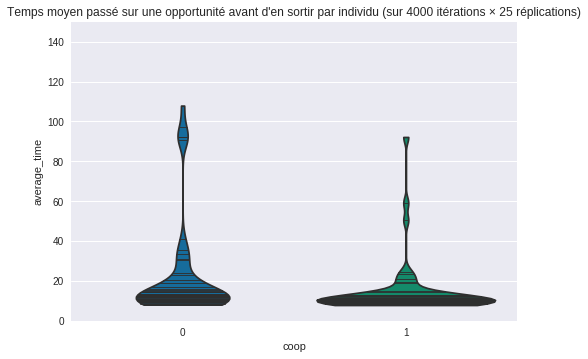

In [65]:
sns.violinplot(data=av_time_on_opp, y='average_time', x='coop', inner='stick', bw=0.2, cut=0)
plt.title('Temps moyen passé sur une opportunité avant d\'en sortir par individu (sur 4000 itérations × 25 réplications)')
plt.ylim((0, 150))